In [93]:
# Jupyter notebook "magic"
%matplotlib inline

In [94]:
import os
import json
from skimage import io, color, transform
from skimage.feature import canny
from skimage.draw import disk
import imageio
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [96]:
os.chdir("E:\M596 Project")

base_directory = os.path.join(os.getcwd(),"New_dataset")

DR_directory = os.path.join(base_directory, 'DR_dataset')
DR_0 = os.path.join(DR_directory, '0')
DR_1 = os.path.join(DR_directory, '1')
DR_2 = os.path.join(DR_directory, '2')
DR_3 = os.path.join(DR_directory, '3')
DR_4 = os.path.join(DR_directory, '4')

# 裁剪

In [8]:
def cropping(img):
    """
    对输入图像进行自定义预处理。
    
    参数:
    - img: 输入图像，应为3通道的彩色图像。
    
    返回:
    返回裁剪后的图像，根据Canny边缘检测的结果，保留边缘区域。
    """
    # 转换为灰度图
    gray_img = color.rgb2gray(img)

    # 使用Canny边缘检测找到眼底图像边缘
    edges = canny(gray_img)

    # 获取边缘区域的边界框
    bbox = np.argwhere(edges > 0)

    # 检查是否存在非零元素
    if bbox.size == 0:
        # 如果没有非零元素，返回原始图像
        return img

    # 计算边界框的坐标范围
    (ystart, xstart), (ystop, xstop) = bbox.min(0), bbox.max(0) + 1

    # 裁剪图像
    cropped_img = img[ystart:ystop, xstart:xstop, :]

    return cropped_img


In [9]:
def batch_crop_and_save(input_directory, output_directory, cropping_function):
    """
    批量裁剪图像并保存。

    参数:
    - input_directory: 包含输入图像的目录路径。
    - output_directory: 保存裁剪后图像的目标目录路径。
    - cropping_function: 自定义的裁剪函数。
    """
    # 确保输出目录存在
    os.makedirs(output_directory, exist_ok=True)

    # 遍历输入目录中的所有图像文件
    for root, dirs, files in os.walk(input_directory):
        for filename in tqdm(files, desc='Processing images'):
            # 构建输入图像的完整路径
            input_path = os.path.join(root, filename)

            # 读取图像
            img = io.imread(input_path)

            # 调用裁剪函数
            cropped_img = cropping_function(img)

            # 获取原始图像的子目录名
            original_subdirectory = os.path.basename(root)

            # 构建裁剪后图像的子目录路径
            output_subdirectory = os.path.join(output_directory, original_subdirectory)

            # 确保裁剪后图像的子目录存在
            os.makedirs(output_subdirectory, exist_ok=True)

            # 构建输出图像的完整路径
            output_path = os.path.join(output_subdirectory, f'Cropped_{filename}')

            # 保存裁剪后的图像
            io.imsave(output_path, cropped_img)

In [11]:
CDR_directory = os.path.join(base_directory, 'Cropped_DR')

In [ ]:
batch_crop_and_save(DR_directory, CDR_directory, cropping)

Processing images: 0it [00:00, ?it/s]
Processing images: 0it [00:00, ?it/s]
Processing images:   1%|▋                                                          | 301/25810 [00:47<59:48,  7.11it/s]C:\Users\Qu Dachen\AppData\Local\Temp\ipykernel_26728\371098089.py:38: UserWarning: E:\M596 Project\DR_dataset\Cropped_DR\0\Cropped_10464_left.jpeg is a low contrast image
  io.imsave(output_path, cropped_img)
Processing images:   2%|█▍                                                       | 642/25810 [01:38<1:15:21,  5.57it/s]C:\Users\Qu Dachen\AppData\Local\Temp\ipykernel_26728\371098089.py:38: UserWarning: E:\M596 Project\DR_dataset\Cropped_DR\0\Cropped_10996_left.jpeg is a low contrast image
  io.imsave(output_path, cropped_img)
Processing images:  14%|████████                                                  | 3586/25810 [09:21<57:17,  6.46it/s]C:\Users\Qu Dachen\AppData\Local\Temp\ipykernel_26728\371098089.py:38: UserWarning: E:\M596 Project\DR_dataset\Cropped_DR\0\Cropped_1557_left.jpeg 

使用Canny边缘检测找到眼底图像边缘，剪切图像应该为近似正方形，因此比对宽高比不近似于一意味着原图像低对比度，成像差，无法分清边缘。因此可以从data中移除。

# 处理异常

In [42]:
def plot_aspect_ratio_distribution(directory):
    """
    绘制图像宽高比分布图。

    参数:
    - directory: 包含图像的目录路径。
    - target_size: 目标大小，格式为 (height, width)。

    返回:
    无返回值，直接绘制分布图。
    """
    aspect_ratios = []

    # 遍历目录中的所有图像文件
    for root, dirs, files in os.walk(directory):
        for filename in tqdm(files, desc='Processing images'):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                # 构建输入图像的完整路径
                input_path = os.path.join(root, filename)

                # 读取图像
                img = io.imread(input_path)

                # 获取宽高比
                height,width,_ = img.shape
                aspect_ratio = min(height, width) / max(height, width)
                if aspect_ratio < 0.85:
                    os.remove(input_path)
                aspect_ratios.append(aspect_ratio)

    return aspect_ratios

In [43]:
img = io.imread(r"E:\M596 Project\New_dataset\Cropped_DR\0\Cropped_36_right.jpeg")
img.shape

(766, 926, 3)

In [47]:
aspect_ratios = plot_aspect_ratio_distribution(CDR_directory)

Processing images: 0it [00:00, ?it/s]
Processing images: 100%|████████████████████████████████████████████████████████████| 353/353 [00:02<00:00, 158.38it/s]


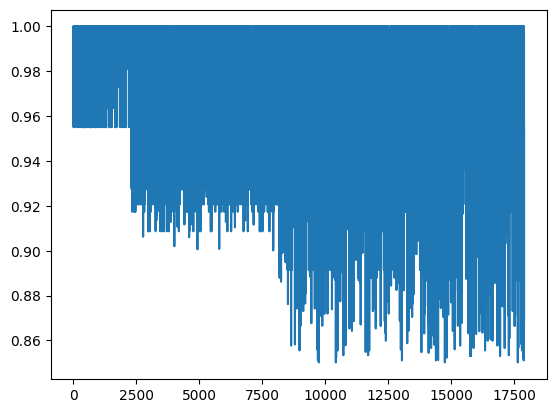

In [48]:
plt.plot(aspect_ratios)

# 分析

In [97]:
def class_images_generator(directory,crop = True, class_name=None, batch_size=32, target_size=(256, 256), shuffle_ctl=False):
    """
    获取指定目录中特定类别的图像。

    参数:
    - directory: 包含图像的目录路径。
    - class_name: 想要获取图像的类别名称。
    - target_size: 目标大小，格式为 (height, width)。
    - batch_size: 每批加载的图像数量。

    返回:
    返回一个 ImageDataGenerator，可以用于迭代获取指定类别的图像。
    """
    image_datagen = ImageDataGenerator(rescale=1./255)

    if class_name is not None:
        # 使用 flow_from_directory 获取指定类别的图像
        class_images_generator = image_datagen.flow_from_directory(
            directory,
            target_size=target_size,
            batch_size=batch_size,
            classes=[class_name],
            class_mode='categorical',  # 请确保使用 categorical 类别
            shuffle=shuffle_ctl
        )
    else:
        # 使用 flow_from_directory 获取所有类别的图像
        class_images_generator = image_datagen.flow_from_directory(
            directory,
            target_size=target_size,
            batch_size=batch_size,
            class_mode='categorical',  # 请确保使用 categorical 类别
            shuffle=shuffle_ctl
        )

    return class_images_generator

In [98]:
CDR_0_generator = class_images_generator(CDR_directory, class_name='0', shuffle_ctl=True)
CDR_1_generator = class_images_generator(CDR_directory, class_name='1', shuffle_ctl=True)
CDR_2_generator = class_images_generator(CDR_directory, class_name='2', shuffle_ctl=True)
CDR_3_generator = class_images_generator(CDR_directory, class_name='3', shuffle_ctl=True)
CDR_4_generator = class_images_generator(CDR_directory, class_name='4', shuffle_ctl=True)

Found 12924 images belonging to 1 classes.
Found 1267 images belonging to 1 classes.
Found 2860 images belonging to 1 classes.
Found 500 images belonging to 1 classes.
Found 353 images belonging to 1 classes.


In [99]:
def random_sample(data_generator):
    batch_images, labels = next(data_generator)
    image = batch_images[12]
    return image

In [100]:
def sample_set():
    image_list = []
    generator_list = [CDR_0_generator,
                      CDR_1_generator,
                      CDR_2_generator,
                      CDR_3_generator, 
                      CDR_4_generator]
    for generator in generator_list:
        image = random_sample(generator)
        image_list.append(image)

    return image_list

In [70]:
def show_color_and_channels(image_data, label, clcs = None):
    """
    Display full-color image and its color channels in a 2x2 subplot.

    Parameters:
    - image_data: Image data in OpenCV format (BGR).

    Returns:
    None
    """
    # 分离颜色通道
    channel_r = image_data[:, :, 0]
    channel_g = image_data[:, :, 1]
    channel_b = image_data[:, :, 2]

    # 创建2x2的子图布局
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    # 在第一个子图中显示全彩图像
    axs[0, 0].imshow(image_data)
    axs[0, 0].set_title('Full Color Image')
    
    if clcs  == None:
        # 在其他三个子图中显示各个颜色通道的图像
        axs[0, 1].imshow(channel_r, cmap='Reds')
        axs[0, 1].set_title('Red Channel')
    
        axs[1, 0].imshow(channel_g, cmap='Greens')
        axs[1, 0].set_title('Green Channel')
    
        axs[1, 1].imshow(channel_b, cmap='Blues')
        axs[1, 1].set_title('Blue Channel')
    else:
        # 在其他三个子图中显示各个颜色通道的灰度图像
        axs[0, 1].imshow(cv2.equalizeHist((channel_r * 255).astype(np.uint8)), cmap='gray')
        axs[0, 1].set_title('Red Channel')
    
        axs[1, 0].imshow(cv2.equalizeHist((channel_g * 255).astype(np.uint8)), cmap='gray')
        axs[1, 0].set_title('Green Channel')
    
        axs[1, 1].imshow(cv2.equalizeHist((channel_b * 255).astype(np.uint8)), cmap='gray')
        axs[1, 1].set_title('Blue Channel')

    # 隐藏坐标轴
    for ax in axs.flat:
        ax.axis('off')

    # 调整子图布局
    plt.suptitle(f"label: {label}")
    plt.tight_layout()

    # 显示图像
    plt.show()

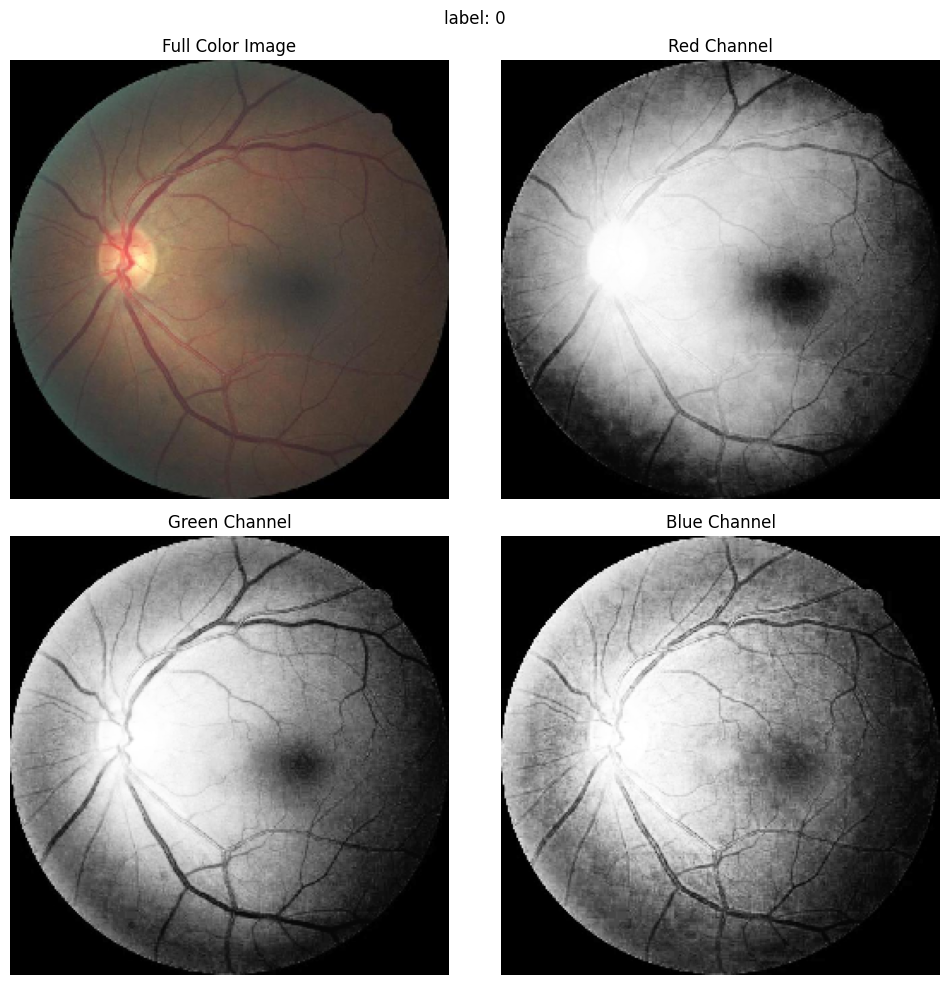

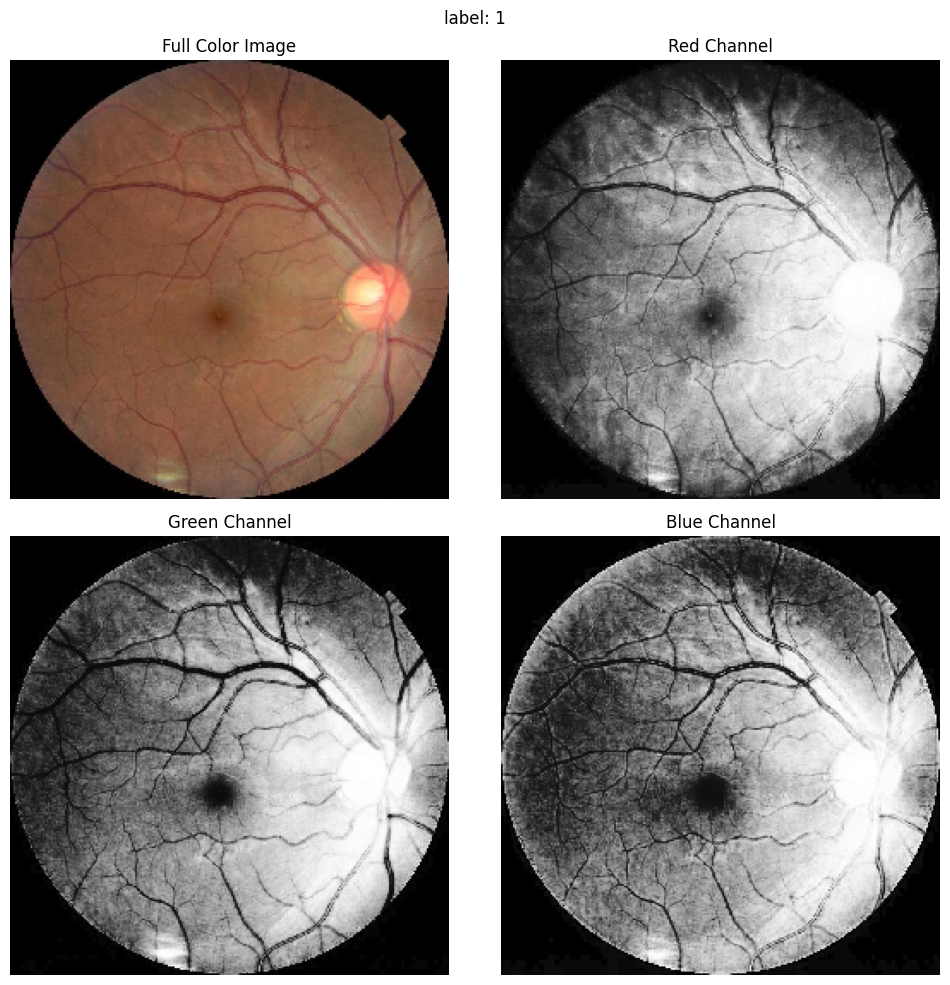

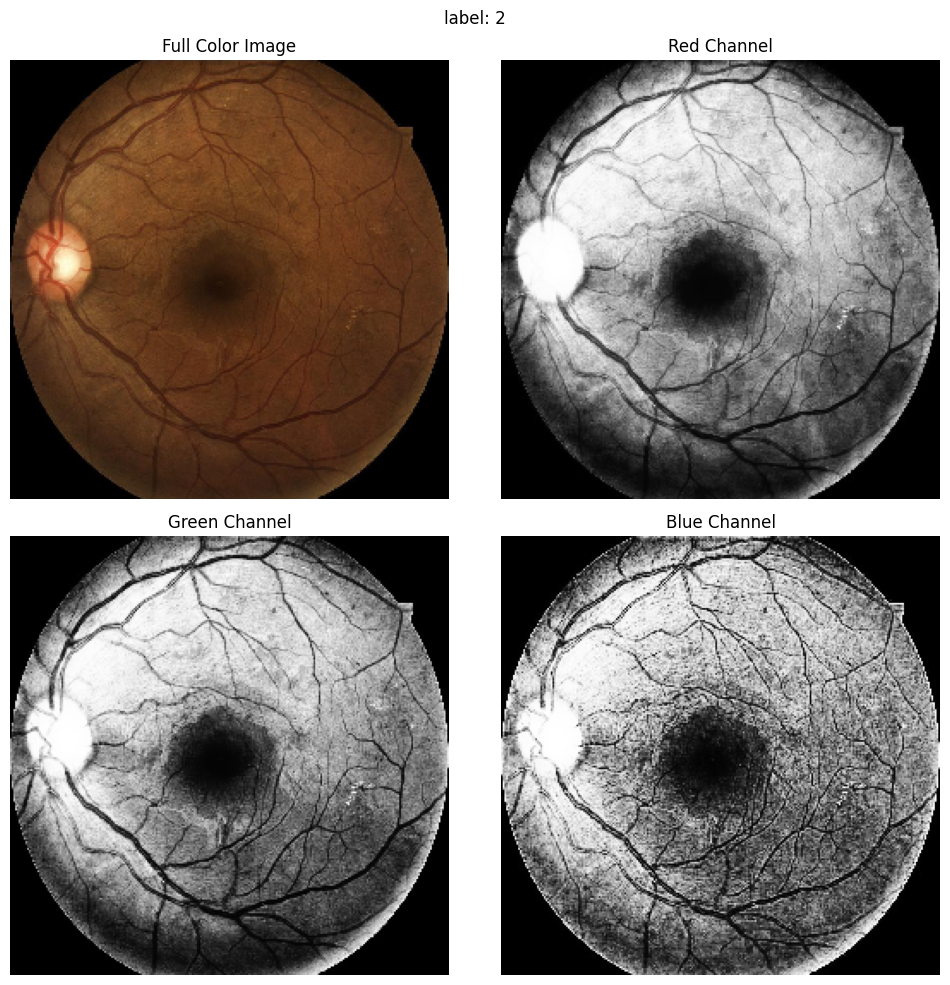

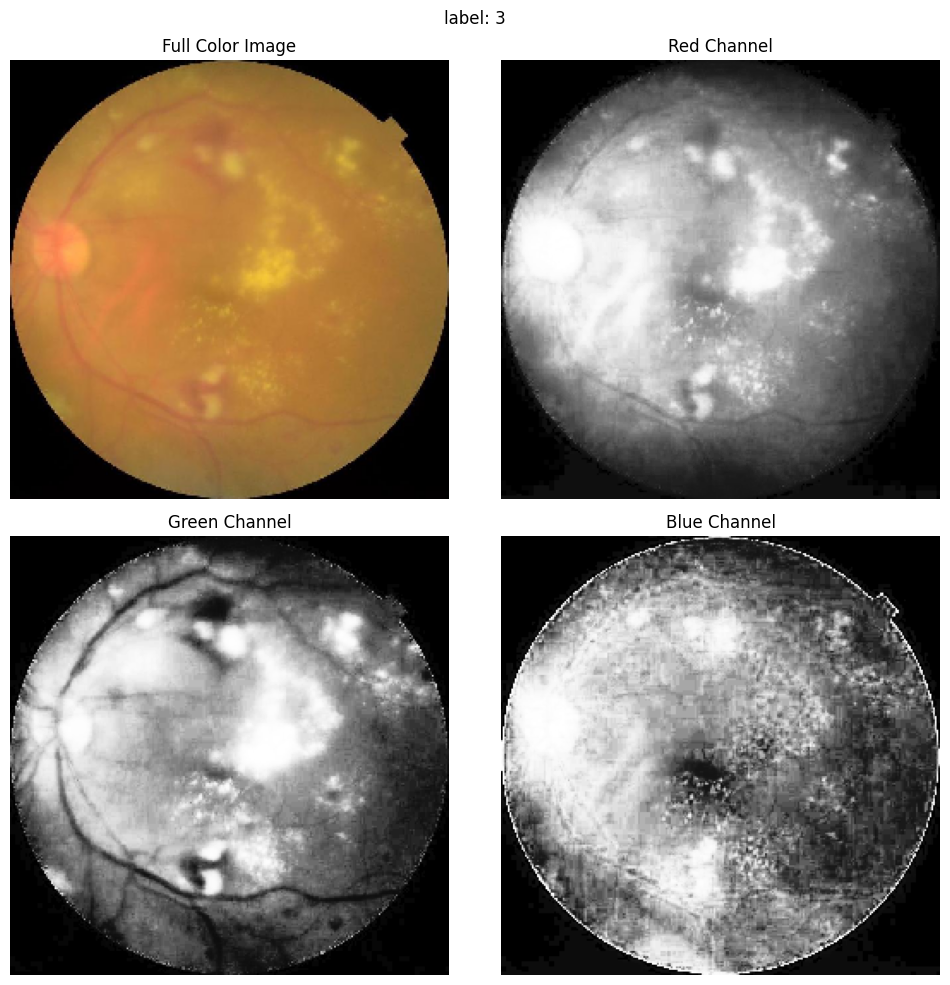

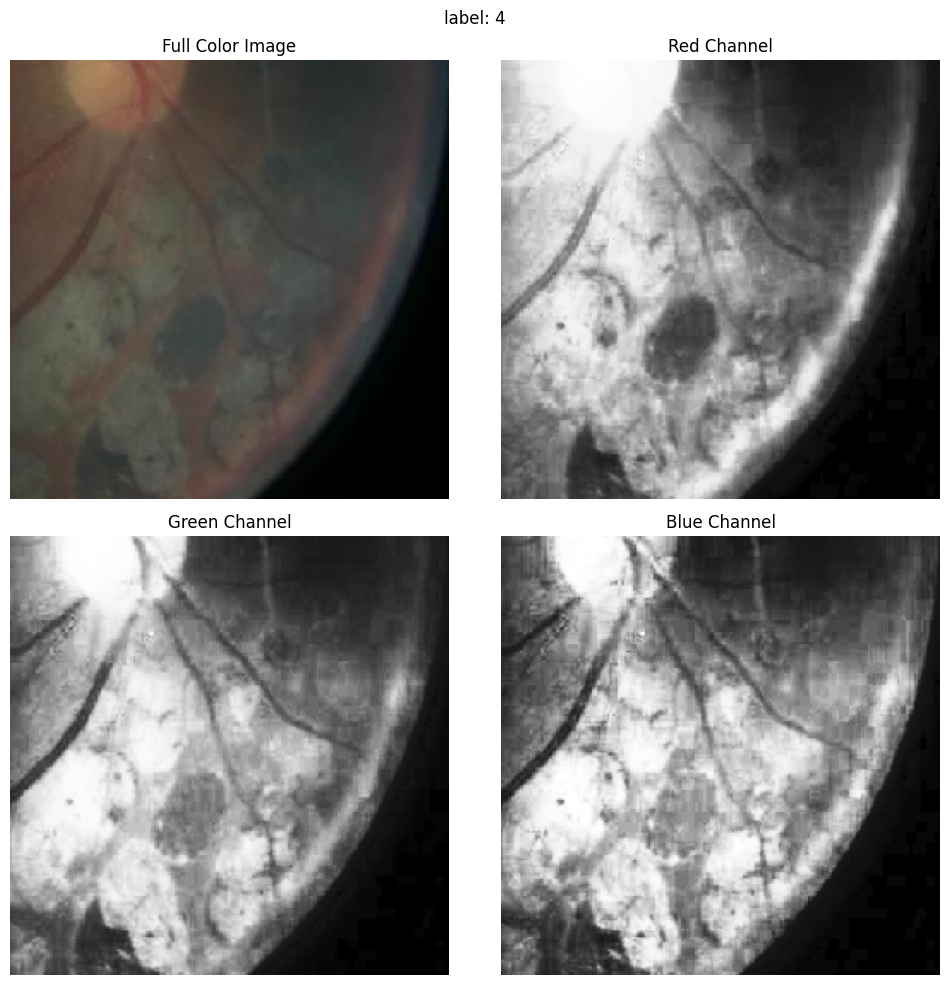

In [80]:
sample_list = sample_set()
label_list = [0,1,2,3,4]
for sample, label in zip(sample_list, label_list):
    show_color_and_channels(sample, label,clcs = 'gray')

In [101]:
batch_images, _ = next(CDR_4_generator)
num_images = len(batch_images)
num_row, num_col, _ = np.shape(batch_images[0])
image_mat = np.zeros((3 * num_row * num_col, num_images), dtype=np.float64)
for cnt, image in enumerate(batch_images):
    image_mat[:, cnt] = image.flatten()
batch_images2, _ = next(CDR_4_generator)
num_images2 = len(batch_images2)
num_row2, num_col2, _ = np.shape(batch_images2[0])
image_mat2 = np.zeros((3 * num_row2 * num_col2, num_images2), dtype=np.float64)
for cnt, image in enumerate(batch_images2):
    image_mat2[:, cnt] = image.flatten()

image_stack = np.hstack([image_mat,image_mat2])
features, samples = image_stack.shape

In [104]:
print(features/3,features/3*0.1,features/3*0.05)

65536.0 6553.6 3276.8


In [ ]:
# 创建一个2万X2万的随机矩阵
matrix = np.random.rand(20000, 20000)

# 估算内存需求（仅供参考，具体情况可能有所不同）
memory_needed = matrix.nbytes + np.linalg.svd(matrix, full_matrices=False, compute_uv=True).nbytes

print(f"估算内存需求：{memory_needed / (1024**3):.2f} GB")

In [89]:
def green_chennel_save(input_directory, output_directory):
    """
    批量裁剪图像并保存。

    参数:
    - input_directory: 包含输入图像的目录路径。
    - output_directory: 保存裁剪后图像的目标目录路径。
    - cropping_function: 自定义的裁剪函数。
    """
    # 确保输出目录存在
    os.makedirs(output_directory, exist_ok=True)

    # 遍历输入目录中的所有图像文件
    for root, dirs, files in os.walk(input_directory):
        for filename in tqdm(files, desc='Processing images'):
            # 构建输入图像的完整路径
            input_path = os.path.join(root, filename)

            # 读取图像
            img = io.imread(input_path)

            # 提取独热编码图像的绿色通道
            green_channel = img[:, :, 1]

            # 获取原始图像的子目录名
            original_subdirectory = os.path.basename(root)

            # 构建提取绿色通道的图像的子目录路径
            output_subdirectory = os.path.join(output_directory, original_subdirectory)

            # 确保提取后图像的子目录存在
            os.makedirs(output_subdirectory, exist_ok=True)

            # 构建输出图像的完整路径
            output_path = os.path.join(output_subdirectory, filename)

            # 保存提取后的图像
            io.imsave(output_path, green_channel)


In [88]:
GCDR_directory = os.path.join(base_directory, 'GreenChannel_DR_dataset')

In [90]:
green_chennel_save(CDR_directory, GCDR_directory)

Processing images: 0it [00:00, ?it/s]
Processing images: 100%|█████████████████████████████████████████████████████████████| 353/353 [00:06<00:00, 53.35it/s]
